In [ ]:
!git clone https://github.com/ria-com/nomeroff-net.git

Cloning into 'nomeroff-net'...
remote: Enumerating objects: 9041, done.
remote: Counting objects: 100% (277/277), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 9041 (delta 122), reused 264 (delta 117), pack-reused 8764
Receiving objects: 100% (9041/9041), 893.43 MiB | 28.92 MiB/s, done.
Resolving deltas: 100% (5622/5622), done.
Checking out files: 100% (456/456), done.


In [ ]:
%cd nomeroff-net

/content/nomeroff-net/nomeroff-net


In [ ]:
!pip3 install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lilohuang/PyTurboJPEG.git to /tmp/pip-install-pectfauc/pyturbojpeg_4922b0db60884e6b8a4dc52e872d24b4
  Running command git clone -q https://github.com/lilohuang/PyTurboJPEG.git /tmp/pip-install-pectfauc/pyturbojpeg_4922b0db60884e6b8a4dc52e872d24b4
  Cloning https://github.com/ria-com/modelhub-client.git to /tmp/pip-install-pectfauc/modelhub-client_f4632106aa244d3388064e7af8d0f125
  Running command git clone -q https://github.com/ria-com/modelhub-client.git /tmp/pip-install-pectfauc/modelhub-client_f4632106aa244d3388064e7af8d0f125


In [ ]:
import numpy as np
from torch import no_grad
from typing import Any, Dict, Optional, Union
from nomeroff_net.image_loaders import BaseImageLoader
from nomeroff_net.pipelines.base import Pipeline
from nomeroff_net.tools import unzip
from nomeroff_net.pipes.number_plate_localizators.yolo_v5_detector import Detector

In [ ]:
path_to_model = '/nomeroff_net/pipes/number_plate_localizators/yolo_v5_detector.py'

In [ ]:
detector = Detector()
detector.load()

YOLOv5 🚀 v6.2-180-g82bec4c Python-3.7.14 torch-1.12.1+cu113 CPU

Fusing layers... 
Model summary: 213 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
model_outputs = detector.predict('/content/Screen.png')

In [ ]:
x1, y1, x2, y2, p, cl = model_outputs[0][0]

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img_1 = cv2.imread('/content/Screen.png', cv2.IMREAD_COLOR)

In [ ]:
cv2_imshow(img_1)

In [ ]:
img_result = img_1.copy()
cv2.rectangle(img_result, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 255), thickness = 1, lineType=cv2.LINE_AA)

cv2_imshow(img_result)

In [ ]:
from nomeroff_net.tools.mcm import (modelhub, get_mode_torch)
from nomeroff_net.tools.image_processing import (distance,
                                                 get_cv_zone_rgb,
                                                 crop_image,
                                                 minimum_bounding_rectangle,
                                                 reshape_points,
                                                 normalize_img)

In [ ]:
model_outputs_int = [int(i) for i in model_outputs[0][0]]
image_part, (x, w, y, h) = crop_image(img_1, model_outputs_int[0:4])

cv2_imshow(image_part)

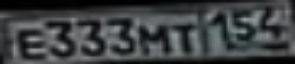

In [ ]:
img_norm = cv2.resize(image_part, (295, 64))

cv2_imshow(img_norm)

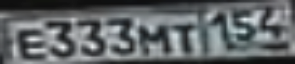

In [ ]:
img_norm_2 = cv2.normalize(img_norm, None, alpha=15, beta=240,
                           norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

cv2_imshow(img_norm_2)